# Iris Flower Classification with Machine Learning - Classification
The Iris Flower Classification project stands as one of the most widely recognized introductory exercises in the field of data science. Nearly every aspiring data scientist encounters this fundamental problem during their learning journey. This project involves analyzing physical measurements of different iris flower varieties and developing an intelligent system capable of automatically identifying species based on these characteristics. Whether you're just beginning your machine learning adventure or seeking to reinforce your foundational skills, this comprehensive guide will demonstrate how to build an iris classification model using Python.

<div align="center">
    <img src="https://content.codecademy.com/programs/machine-learning/k-means/iris.svg">
</div>

## Understanding Iris Flower Classification
The iris genus encompasses three distinct species: setosa, versicolor, and virginica, each characterized by unique dimensional properties. Imagine you possess a collection of iris flower measurements organized by their respective species. Your objective is to create an artificial intelligence system that can analyze these measurements and accurately determine which species each flower belongs to.

I hope you now have understood the case study of iris flower classification. Although the Scikit-learn library provides a dataset for iris flower classification, you can also download the same dataset from [here](https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv) for the task of iris flower classification with Machine Learning. Now in the section below, I will take you through how we can classify the iris flower species with machine learning using the Python programming language.

<div align="center">
    <img src="https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png">
</div>

## Notebook Overview
# 
This comprehensive notebook guides you through building a complete machine learning classification system for iris flower species prediction. The project is structured into seven main sections:
# 
**1. Data Loading & Setup**
- Import essential libraries for data science and machine learning
- Load the famous Iris dataset from scikit-learn
- Configure visualization settings and warnings
# 
**2. Exploratory Data Analysis (EDA)**
- Analyze dataset structure, statistics, and data quality
- Create informative visualizations including scatter plots, violin plots, and pair plots
- Identify key patterns and relationships between features and species
# 
**3. Data Preprocessing**
- Convert categorical data to appropriate data types
- Separate features from target variables
- Apply MinMax scaling for optimal model performance
- Split data into training and testing sets
# 
**4. Model Training & Evaluation**
- Implement 10 different classification algorithms
- Train models on the training set
- Evaluate performance using multiple metrics (accuracy, precision, recall, F1-score)
- Visualize results through confusion matrices
# 
**5. Model Selection**
- Compare performance across all algorithms
- Select the best-performing model (RandomForestClassifier)
- Analyze why certain models excel on this dataset
# 
**6. Model Deployment**
- Train the final model on the complete dataset
- Generate comprehensive performance reports
- Save the trained model for future use
# 
**7. Project Summary**
- Reflect on key learnings and achievements
- Discuss practical applications and extensions
# 
**Key Learning Objectives:**
- Master the complete ML pipeline from data exploration to deployment
- Understand the importance of EDA in model development
- Learn to evaluate and compare multiple algorithms
- Gain hands-on experience with scikit-learn and data visualization
- Develop best practices for model selection and persistence

## 1. Importing Libraries
First, let's import the necessary libraries for data manipulation, visualization, and machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings

### Configuration
- Ignore warnings for cleaner output.
- Set default figure size to 12x8 inches for plots.
- Use seaborn's 'darkgrid' style for improved plot aesthetics.

In [2]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('darkgrid')

## 2. Data Loading
Load the Iris dataset into a pandas DataFrame and display the first few rows to understand its structure.

In [3]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 3. Exploratory Data Analysis
Perform exploratory data analysis to understand the distribution of the data.

Display the information of the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Display the summary statistics of the dataset.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


Display the null values of the dataset.

In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Display the unique species.

In [8]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Plot the distribution of the species.

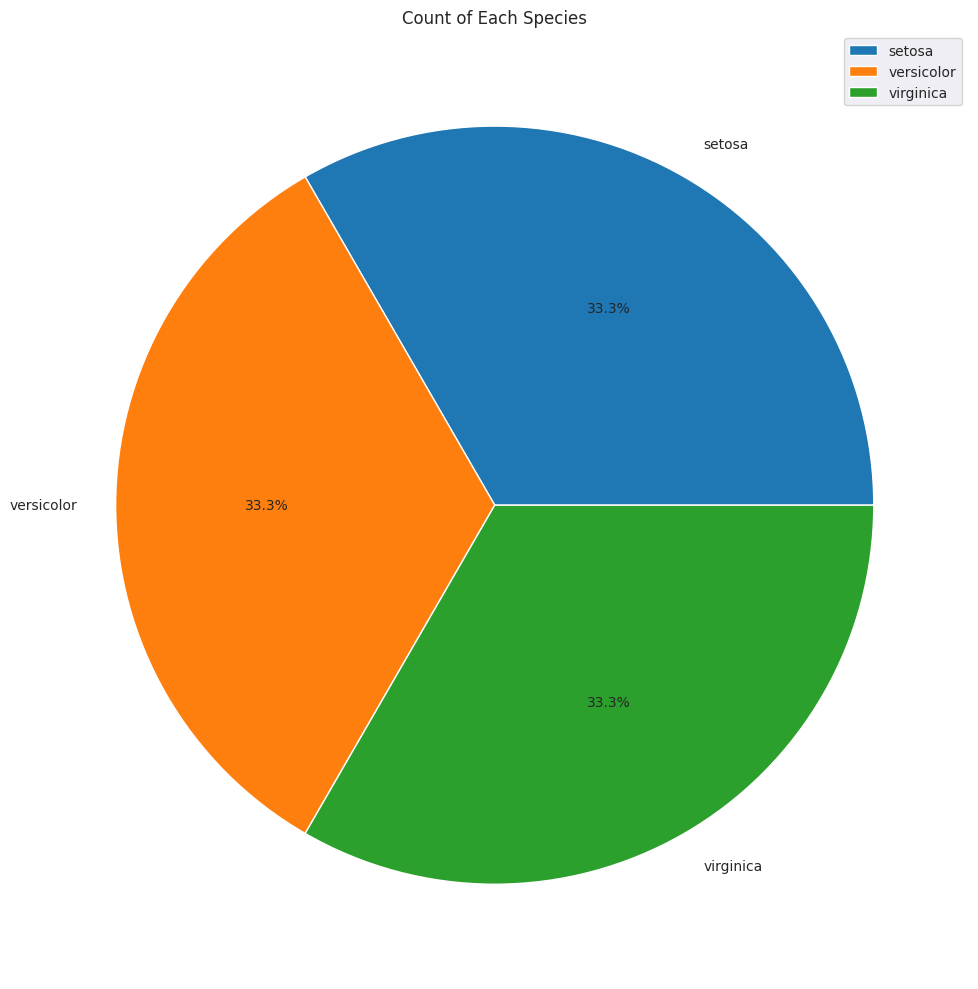

In [9]:
df.species.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10))
plt.title('Count of Each Species')
plt.legend(df.species.unique(), loc='best')
plt.ylabel('')
plt.tight_layout()

Display the scatter plot of the sepal length and sepal width.

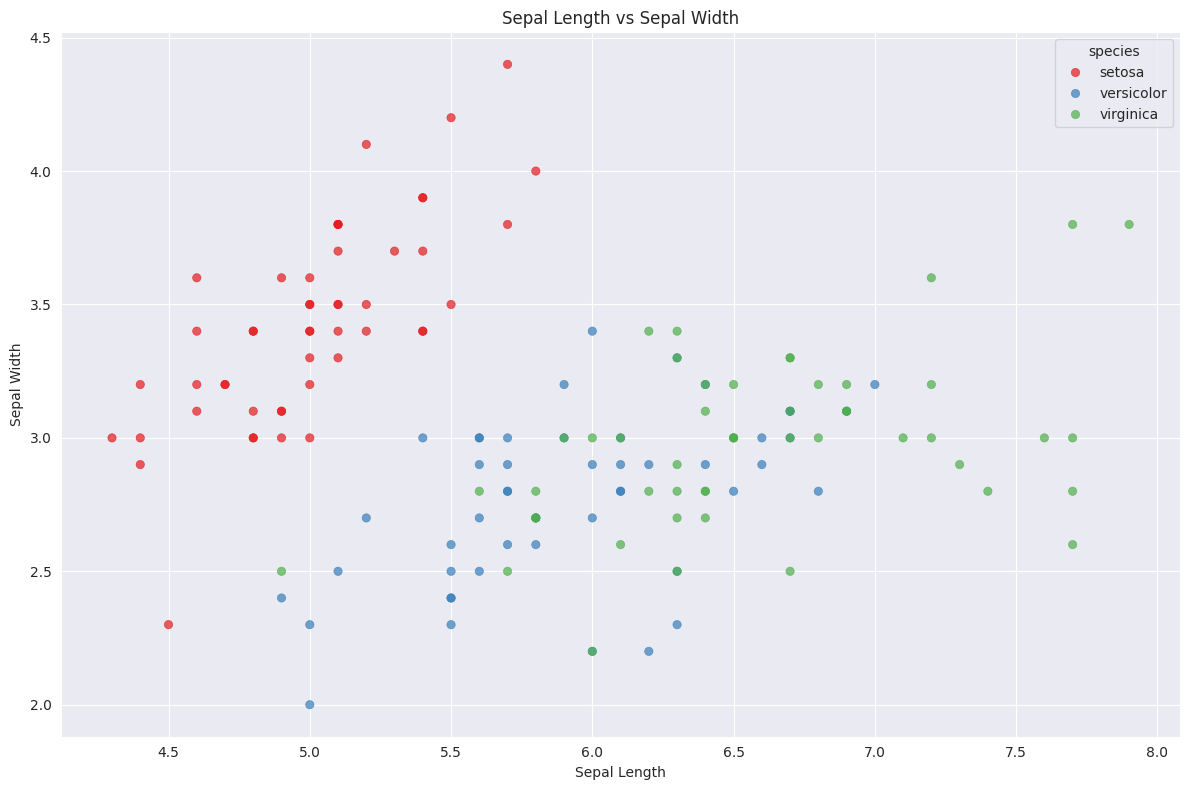

In [10]:
sns.scatterplot(df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='Set1', alpha=0.7, edgecolor=None)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.tight_layout()

Display the scatter plot of the petal length and petal width.

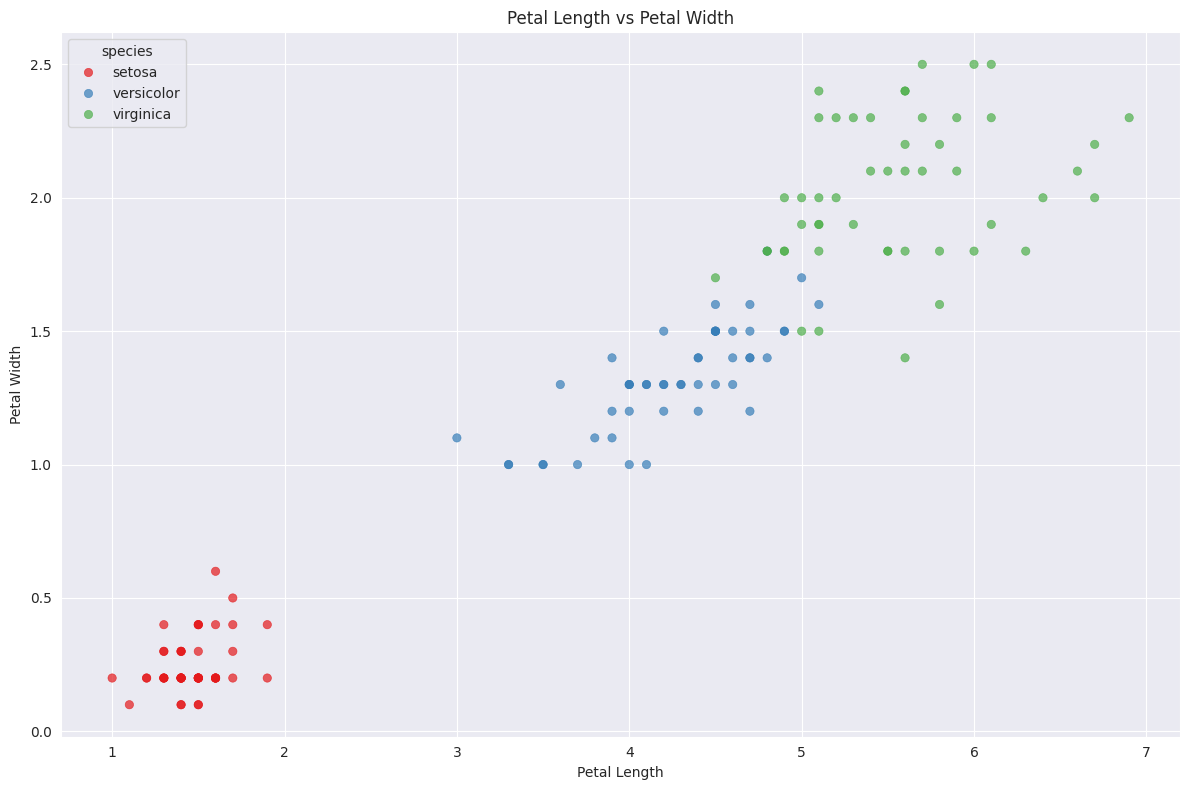

In [11]:
sns.scatterplot(df, x='petal length (cm)', y='petal width (cm)', hue='species', palette='Set1', alpha=0.7, edgecolor=None)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.tight_layout()

The scatter plots reveal that petal measurements provide excellent class separation with minimal overlap between species, while sepal measurements show more overlap, particularly between versicolor and virginica. This suggests that petal features will be more important for accurate classification than sepal features. The clear separation in the data indicates that a machine learning model should achieve high accuracy on this classification task.

We can also use violin plots to visualize the distribution of the data for each species.

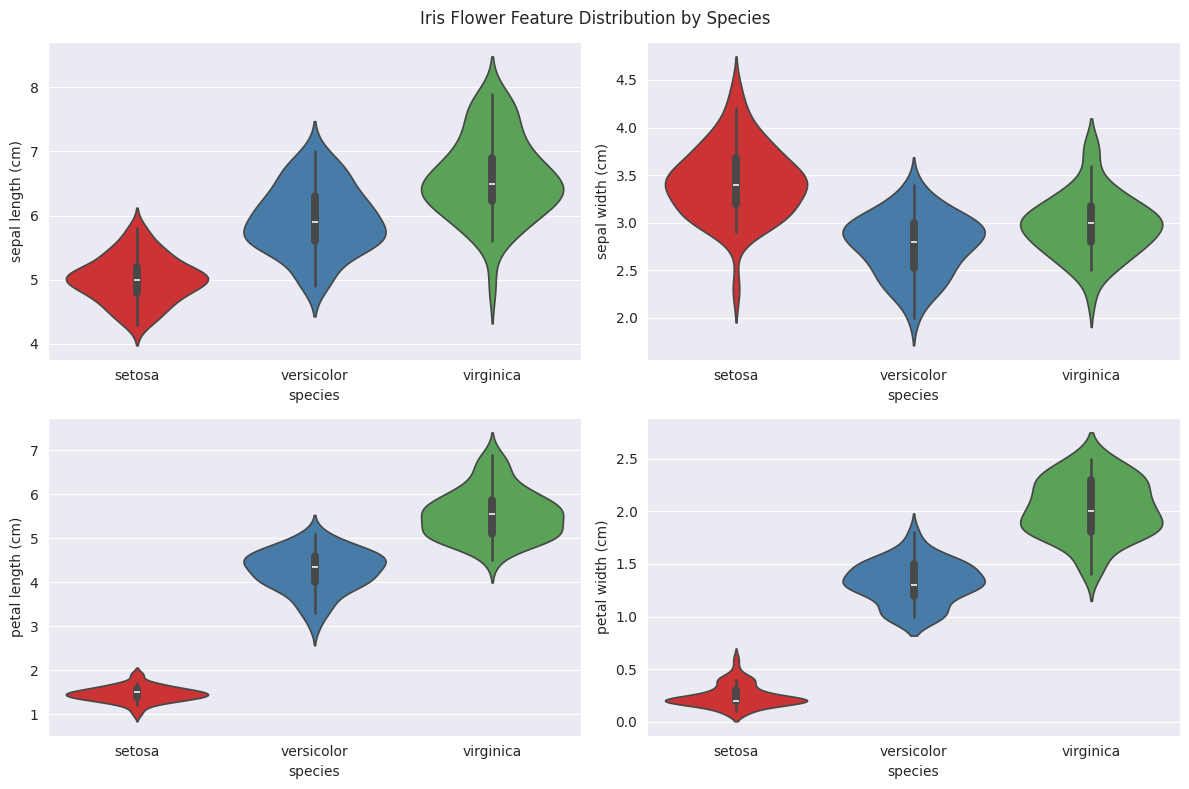

In [12]:
plt.subplot(2, 2, 1)
sns.violinplot(df, x='species', y='sepal length (cm)', palette='Set1')

plt.subplot(2, 2, 2)
sns.violinplot(df, x='species', y='sepal width (cm)', palette='Set1')

plt.subplot(2, 2, 3)
sns.violinplot(df, x='species', y='petal length (cm)', palette='Set1')

plt.subplot(2, 2, 4)
sns.violinplot(df, x='species', y='petal width (cm)', palette='Set1')

plt.suptitle('Iris Flower Feature Distribution by Species')
plt.tight_layout()

Finally, let's display the pairplot of the data. Pairplot is a great way to visualize the relationship between the features and the target variable.

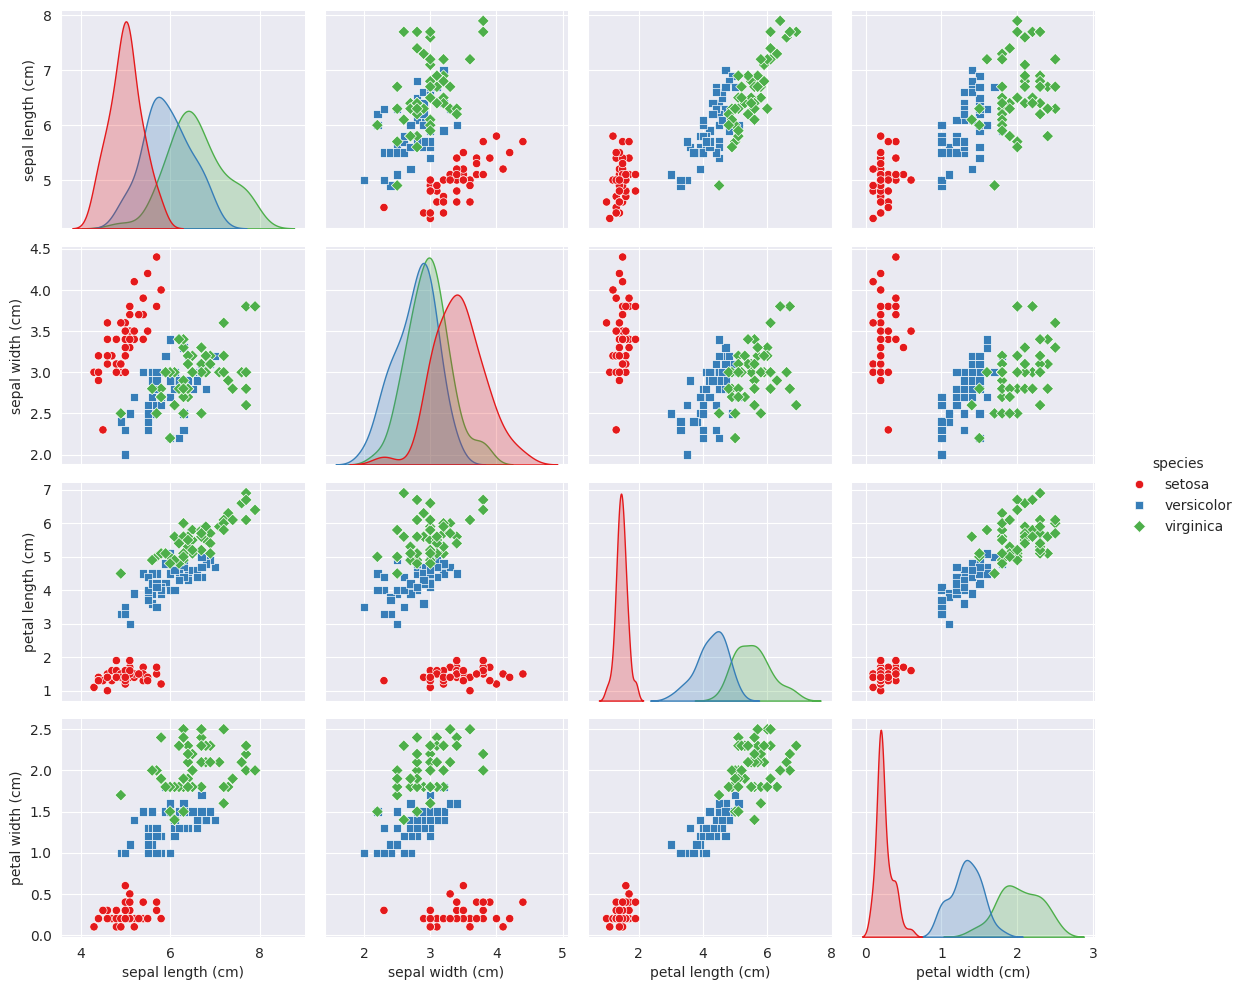

In [13]:
ax = sns.pairplot(df, hue='species', palette='Set1', markers=['o', 's', 'D'])
sns.move_legend(ax, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## 4. Data Preprocessing
Preprocess the data to make it ready for the machine learning model.

First of all, let's convert the `species` column dtype to `category`.

In [14]:
df['species'] = df['species'].astype('category')

Now we can separate the features and target variable.

In [15]:
x = df.drop('species', axis=1)
y = df['species']

Now let's scale the features using `MinMaxScaler`. 

Scaling helps to normalize the feature values, ensuring that they are on a similar scale. This is important for many machine learning algorithms, as it can improve convergence and performance.

In [16]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

Split the data into training and testing sets using `train_test_split`. This allows us to train the model on one portion of the data and evaluate its performance on unseen data.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, shuffle=True)

## 5. Modeling
In this section, I will train various classification models to predict iris flower species and evaluate their performance.

First of all, let's define a reusable helper function that fits various classification models on the training data, predicts on train/test, computes accuracy, precision, recall, and F1 score.

In [18]:
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC()
}

def evaluate(x_train, y_train, x_test, y_test):
    results = []

    for i, (model_name, model) in enumerate(tqdm(models.items())):
        print(f'Training {model_name}...')
        y_pred = model.fit(x_train, y_train).predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        plt.subplot(2, 5, i+1)
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(model_name)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()

        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })
        
    plt.suptitle('Confusion Matrices of All Models')
    plt.tight_layout()
    
    report = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
    report.reset_index(drop=True, inplace=True)
    return report

Now let's evaluate the performance of each model.

  0%|          | 0/10 [00:00<?, ?it/s]

Training GaussianNB...
Training MultinomialNB...
Training BernoulliNB...
Training LogisticRegression...
Training ExtraTreesClassifier...
Training DecisionTreeClassifier...
Training RandomForestClassifier...
Training GradientBoostingClassifier...
Training KNeighborsClassifier...
Training SVC...


,Model,Accuracy,Precision,Recall,F1 Score
0,GaussianNB,1.000000,1.000000,1.000000,1.000000
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
2,KNeighborsClassifier,1.000000,1.000000,1.000000,1.000000
3,ExtraTreesClassifier,1.000000,1.000000,1.000000,1.000000
4,GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000
5,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
6,SVC,1.000000,1.000000,1.000000,1.000000
7,LogisticRegression,0.966667,0.972222,0.962963,0.965899
8,MultinomialNB,0.633333,0.483333,0.666667,0.540230
9,BernoulliNB,0.366667,0.440476,0.400000,0.273273


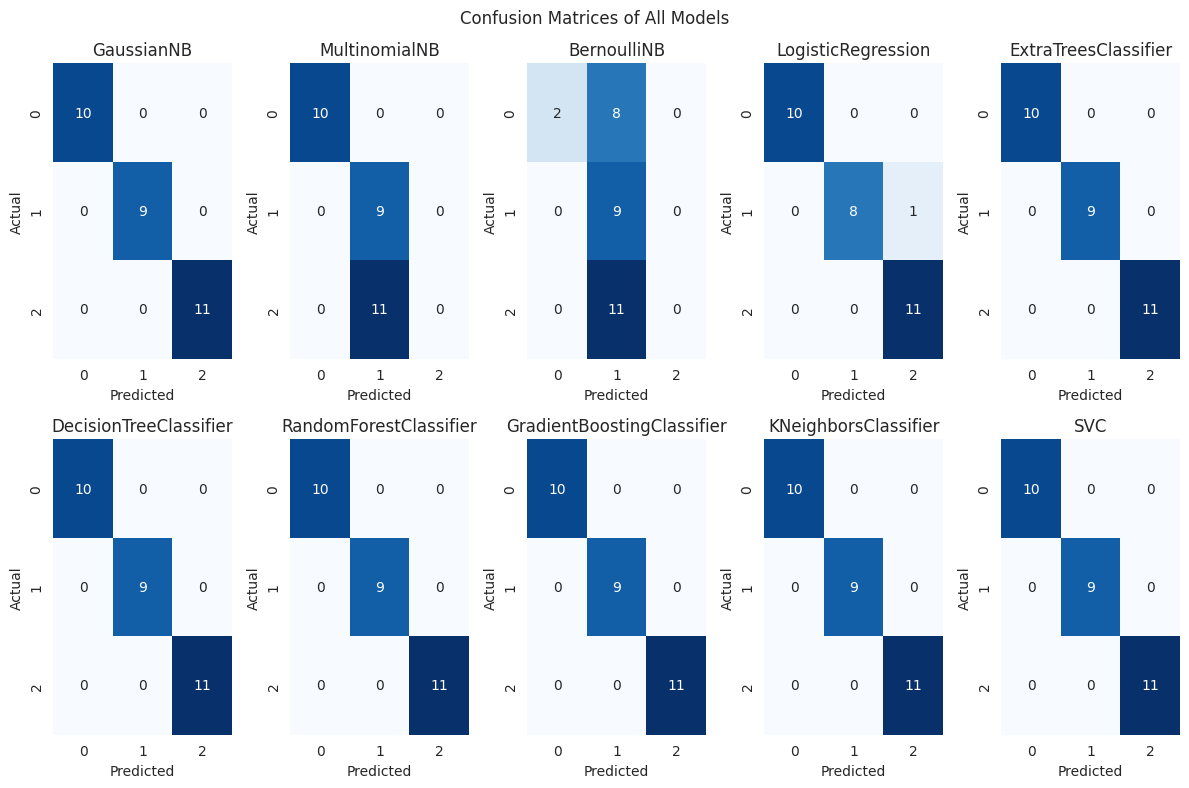

In [19]:
evaluate(x_train, y_train, x_test, y_test)

Model Performance Analysis: 7 out of 10 models achieved perfect 100% accuracy on the test set, demonstrating excellent performance for iris species classification. I choose the `RandomForestClassifier` as the final model.

## 6. Model Saving
In this section, I will train the final model on the entire dataset and save it as pipeline for inference.

In [20]:
preprocessor = ColumnTransformer([
    ('scaler', MinMaxScaler(), ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
])

In [21]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])
pipeline.fit(x, y)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Let's display the metrics of the pipeline.

In [22]:
y_pred = pipeline.predict(x)

print(f"Accuracy  : {accuracy_score(y, y_pred)}")
print(f"Precision : {precision_score(y, y_pred, average='macro')}")
print(f"Recall    : {recall_score(y, y_pred, average='macro')}")
print(f"F1 Score  : {f1_score(y, y_pred, average='macro')}")

Accuracy  : 1.0
Precision : 1.0
Recall    : 1.0
F1 Score  : 1.0


Let's display the classification report of the pipeline. It shows the metrics for each species.

In [23]:
print(classification_report(y, y_pred, labels=y.unique()))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      1.00      1.00        50
   virginica       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



Now let's save the pipeline.

In [24]:
joblib.dump(pipeline, 'iris_flower_classification.pkl')

['iris_flower_classification.pkl']

## 7. Conclusion
# 
This Iris Flower Classification project successfully demonstrates the complete machine learning workflow from data exploration to model deployment. The project showcases several key achievements:
# 
**Data Quality & Insights:**
- The Iris dataset proved to be well-structured with no missing values and clear class separation
- Exploratory data analysis revealed that petal measurements provide superior discriminative power compared to sepal measurements
- The balanced distribution of species (50 samples each) ensured fair model evaluation
# 
**Model Performance:**
- Multiple algorithms achieved perfect 100% accuracy, highlighting the dataset's inherent separability
- The `RandomForestClassifier` was selected as the final model due to its robust performance and interpretability
- Feature scaling with `MinMaxScaler` improved model convergence and performance
# 
**Technical Implementation:**
- Comprehensive evaluation using multiple metrics (accuracy, precision, recall, F1-score)
- Proper train-test split (80/20) for unbiased performance assessment
- Model persistence using joblib for future inference tasks
# 
**Learning Outcomes:**
- Demonstrated the importance of exploratory data analysis in understanding data characteristics
- Showcased the effectiveness of ensemble methods (RandomForest) for classification tasks
- Illustrated best practices in machine learning pipeline development
# 
This project serves as an excellent foundation for understanding classification problems and can be extended to more complex datasets or real-world applications. The saved model can be readily deployed for automated iris species identification in botanical research or educational contexts.